# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
from collections import Counter

In [2]:
trainData = pd.read_csv('Data/train.csv')
testData = pd.read_csv('Data/test.csv')
print(trainData.info())

print("\nShapes of both trainData and testData")
print(trainData.shape)
print(testData.shape)
print('\n')
trainData.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   
5           5  111157  Female     Loyal Customer   26  Personal Travel   
6           6   82113    Male     Loyal Customer   47  Personal Travel   
7           7   96462  Female     Loyal Customer   52  Business travel   
8           8   79485  Female     Loyal Customer   41  Business travel   
9           9   65725    Male  disloyal Customer   20  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   
5       Eco             1180                      3   
6       Eco             1276                      2   
7  Business             2035                      4   
8  Business              853                      1   
9       Eco             1061                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   
5                                  4  ...                       1   
6                                  4  ...                       2   
7                                  3  ...                       5   
8                                  2  ...                       1   
9                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   
5                 3                 4                 4                4   
6                 3                 3                 4                3   
7                 5                 5                 5                4   
8                 1                 2                 1                4   
9                 2                 3                 4                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   
5                 4            1                           0   
6                 5            2                           9   
7                 5            4                           4   
8                 1            2                           0   
9                 3            2                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4    

In [3]:
def read_df(file):
    df = pd.read_csv(file)
    df = df.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
    return df


trainData = read_df('Data/train.csv')
testData = read_df('Data/test.csv')
trainData.describe()

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [4]:
print(trainData.isnull().sum())
print(testData.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
Gender                                0
Cust

## Handling null values

> Let's assign Arrival Delay in Minutes for both trainData and testData to the mean value of all other known inputs for the column

In [5]:
trainArrivalMean = round(trainData["Arrival Delay in Minutes"].mean())
testArrivalMean = round(testData["Arrival Delay in Minutes"].mean())
trainData["Arrival Delay in Minutes"].fillna(trainArrivalMean, inplace = True)
testData["Arrival Delay in Minutes"].fillna(testArrivalMean, inplace = True)

# Check to see if null values are still present
print(trainData.isnull().sum())
print(testData.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64
Gender                               0
Customer Type                        0
Age         

## Conversion of variable types

We convert categorical variables into ordinal discrete variables so our models/EDA techniques can interact and extract meaningful information from the data if the variables are of any importance at all.

In [6]:
categoryDict = {}
for i, col in enumerate(trainData):
    if(trainData[col].dtype == 'object'):
        values = trainData[col].unique()
        trainData[[col]] = trainData[[col]].apply(lambda x: pd.Categorical(x).codes)
        catValues = trainData[col].unique()
        currDict = dict(zip(values, catValues))
        categoryDict.update(currDict)
print(trainData.info())
# categoryDict will hold the names of all categorical values along with their referenced number so it will be
# easier to explain the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int8   
 1   Customer Type                      103904 non-null  int8   
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int8   
 4   Class                              103904 non-null  int8   
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## Memory usage reduction

> We can also reduce the memory usage furthermore by changing the int64 datatype variable to use less bytes if numbers of that size don't exist. Let's change int64 to int32 and see how much memory we can save

In [7]:
before = round(trainData.memory_usage(deep = True).sum()/1000000, 2)
print("Before data transform " + str(before))

for i, col in enumerate(trainData.columns):
    maxNum = trainData[col].max()
    if trainData[col].dtype == 'int64':
        if maxNum < 127:
            trainData[col] = trainData[col].astype('int8')
        elif maxNum > 127 and maxNum < 32767:
            trainData[col] = trainData[col].astype('int32')

after = round(trainData.memory_usage(deep = True).sum()/1000000, 2)
print("After data transform "  + str(after))
print("The above transform has decreased memory usage by " + str(round(100-((after*100)/before), 2)) + "%")

Before data transform 15.48
After data transform 3.74
The above transform has decreased memory usage by 75.84%


## Normalization

In [8]:
n_trainData = (trainData-trainData.mean())/trainData.std() 

In [9]:
n_trainData.describe()

Gender  Customer Type           Age  Type of Travel  \
count  1.039040e+05   1.039040e+05  1.039040e+05    1.039040e+05   
mean   3.788504e-17  -2.872151e-17 -2.549034e-17   -7.282954e-17   
std    1.000000e+00   1.000000e+00  1.000000e+00    1.000000e+00   
min   -9.851873e-01  -4.727644e-01 -2.142229e+00   -6.708614e-01   
25%   -9.851873e-01  -4.727644e-01 -8.190365e-01   -6.708614e-01   
50%   -9.851873e-01  -4.727644e-01  4.103839e-02   -6.708614e-01   
75%    1.015026e+00  -4.727644e-01  7.687940e-01    1.490607e+00   
max    1.015026e+00   2.115198e+00  3.018221e+00    1.490607e+00   

              Class  Flight Distance  Inflight wifi service  \
count  1.039040e+05     1.039040e+05           1.039040e+05   
mean   6.831616e-17     8.000991e-17           1.204252e-16   
std    1.000000e+00     1.000000e+00           1.000000e+00   
min   -9.570495e-01    -1.161763e+00          -2.055748e+00   
25%   -9.570495e-01    -7.776668e-01          -5.495308e-01   
50%    6.537789e-01    -3.474395e-01           2.035780e-01   
75%    6.537789e-01     5.551353e-01           9.566867e-01   
max    2.264607e+00     3.804405e+00           1.709795e+00   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       1.039040e+05            1.039040e+05   
mean                       -1.155699e-16            1.262379e-16   
std                         1.000000e+00            1.000000e+00   
min                        -2.006653e+00           -1.970722e+00   
25%                        -6.952418e-01           -5.410570e-01   
50%                        -3.953644e-02            1.737753e-01   
75%                         6.161689e-01            8.886076e-01   
max                         1.271874e+00            1.603440e+00   

       Gate location  ...  Inflight entertainment  On-board service  \
count   1.039040e+05  ...            1.039040e+05      1.039040e+05   
mean    4.280872e-17  ...           -8.462587e-17      1.377265e-16   
std     1.000000e+00  ...            1.000000e+00      1.000000e+00   
min    -2.330020e+00  ...           -2.519266e+00     -2.625336e+00   
25%    -7.646106e-01  ...           -1.018880e+00     -1.072968e+00   
50%     1.809417e-02  ...            4.815056e-01      4.794003e-01   
75%     8.007989e-01  ...            4.815056e-01      4.794003e-01   
max     1.583504e+00  ...            1.231698e+00      1.255584e+00   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count      1.039040e+05      1.039040e+05     1.039040e+05      1.039040e+05   
mean       1.086972e-16      1.914767e-18     3.251685e-17      5.607532e-17   
std        1.000000e+00      1.000000e+00     1.000000e+00      1.000000e+00   
min       -2.547160e+00     -2.228661e+00    -2.611270e+00     -3.096489e+00   
25%       -1.026946e+00     -5.350423e-01    -2.404706e-01     -5.447375e-01   
50%        4.932676e-01      3.117670e-01    -2.404706e-01      3.058464e-01   
75%        4.932676e-01      1.158576e+00     5.497960e-01      1.156430e+00   
max        1.253374e+00      1.158576e+00     1.340063e+00      1.156430e+00   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  1.039040e+05                1.039040e+05              1.039040e+05   
mean  -4.321903e-17                1.853221e-17             -1.668583e-17   
std    1.000000e+00                1.000000e+00              1.000000e+00   
min   -2.504320e+00               -3.875299e-01             -3.927999e-01   
25%   -9.802465e-01               -3.875299e-01             -3.927999e-01   
50%   -2.182099e-01               -3.875299e-01             -3.927999e-01   
75%    5.438268e-01               -7.364771e-02             -5.636889e-02   
max    1.305863e+00                4.125418e+01              4.060002e+01   

       satisfaction  
count  1.039040e+05  
mean  -3.316650e-17  
std    1.000000e+00  
min   -8.744693e-01  
25%   -8.744693e-01  
50%   -8.744693e-01  
75%    1.1

# Exploratory Data Analysis

In [10]:
trainData.describe()

Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.000000      27.000000        0.000000   
50%         0.000000       0.000000      40.000000        0.000000   
75%         1.000000       0.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000               2.000000   
50%         1.000000       843.000000               3.000000   
75%         1.000000      1743.000000               4.000000   
max         2.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...  Inflight entertainment  On-board service  \
count  103904.000000  ...           103904.000000     103904.000000   
mean        2.976883  ...                3.358158          3.382363   
std         1.277621  ...                1.332991          1.288354   
min         0.000000  ...                0.000000          0.000000   
25%         2.000000  ...                2.000000          2.000000   
50%         3.000000  ...                4.000000          4.000000   
75%         4.000000  ...                4.000000          4.000000   
max         5.000000  ...                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  103904.000000               103904.000000             103904.000000   
mean        3.286351                   14.815618                 15.178145   
std         1.312273                   38.230901                 38.640910   
min         0.000000                    0.000000                  0.000000   
25%         2.000000                    0.000000                  0.000000   
50%         3.000000                    0.000000                  0.000000   
75%         4.000000                   12.000000                 13.000000   
max         5.000000                 1592.000000               1584.000000   

        satisfaction  
count  103904.000000  
mean        0.433333  
std         0.495538  
min         0.000000  
25%         0.

## Correlation Matrix

<AxesSubplot: >

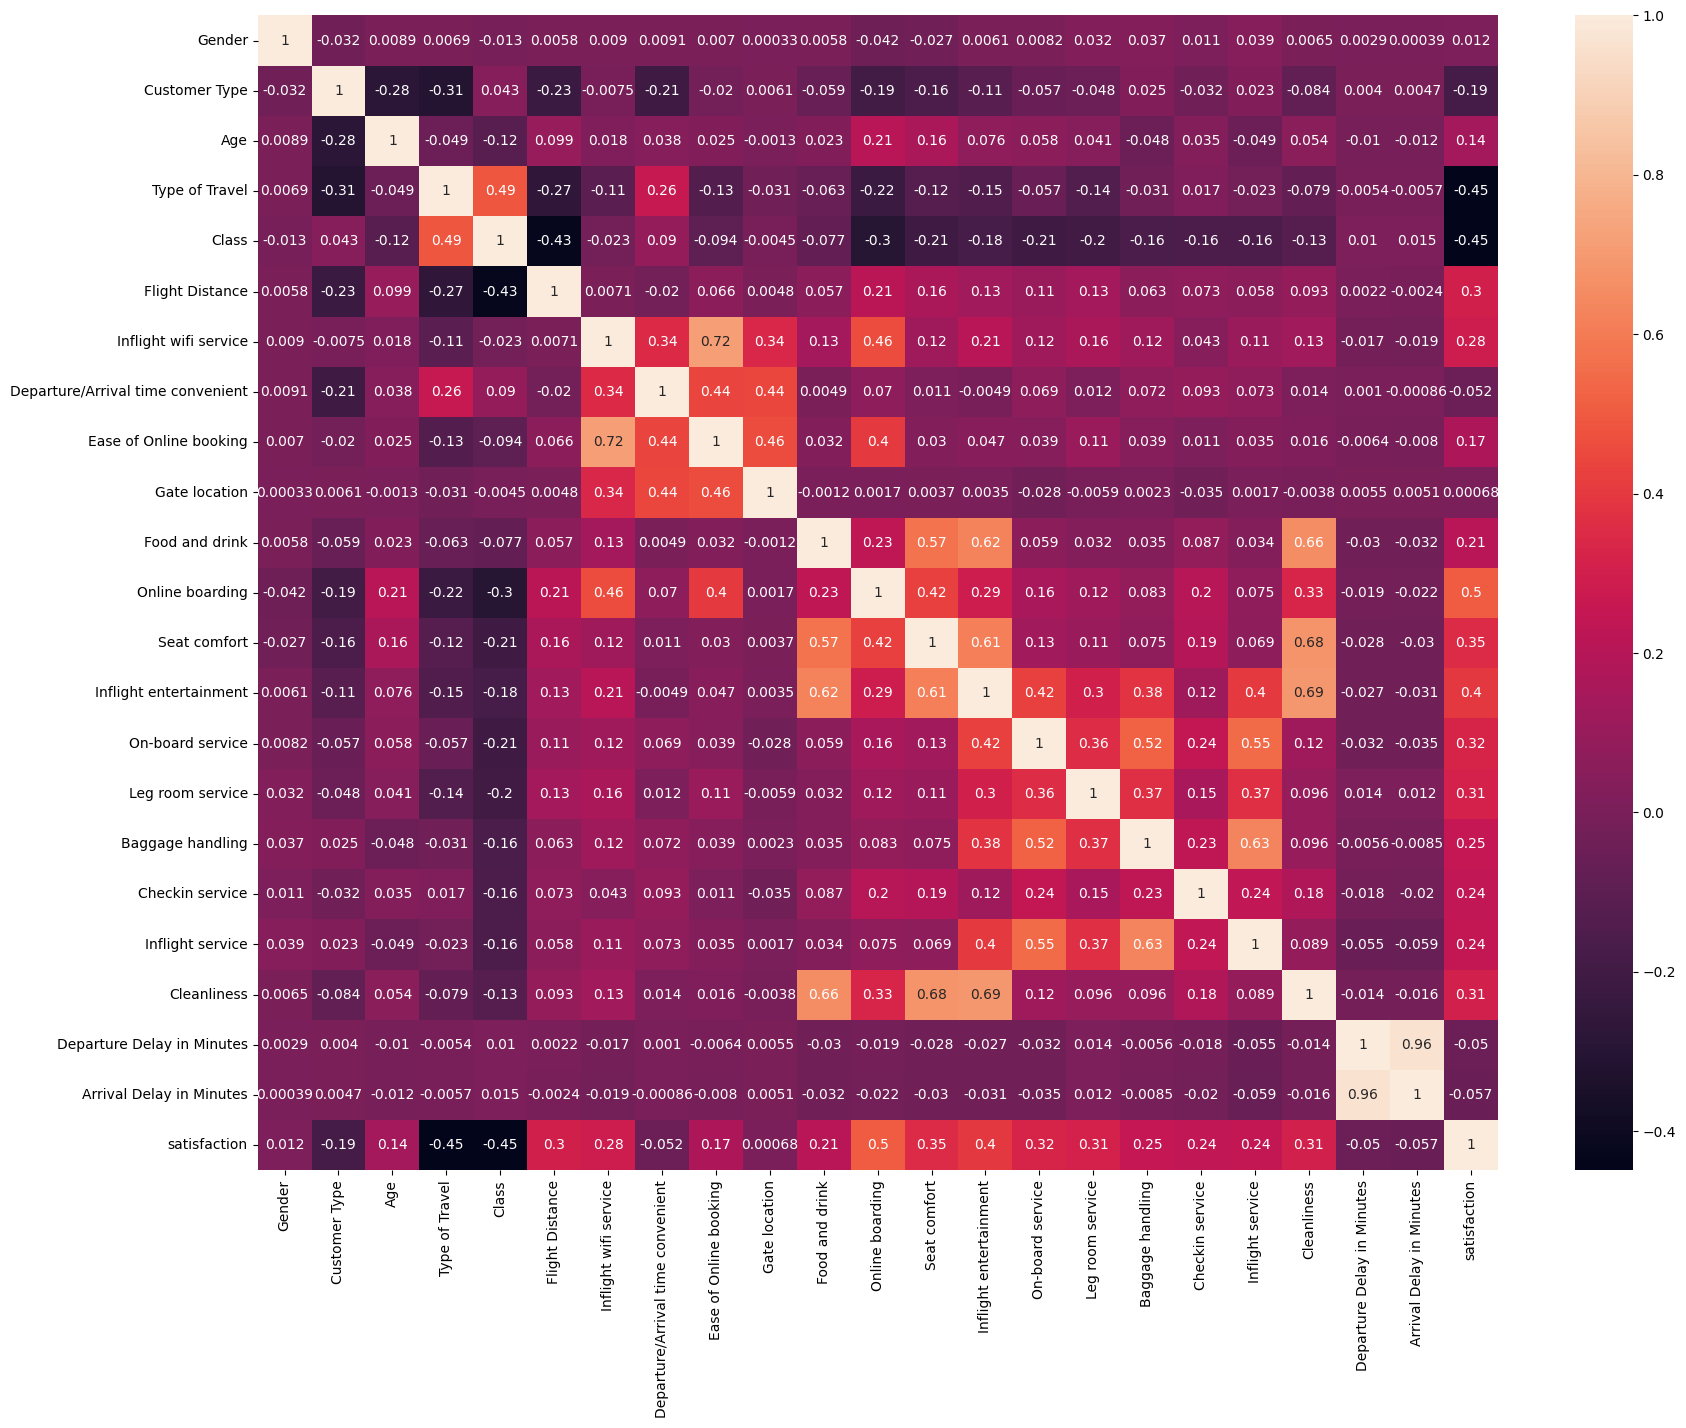

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(trainData.corr(), annot=True)

## Distribution

<AxesSubplot: xlabel='satisfaction', ylabel='count'>

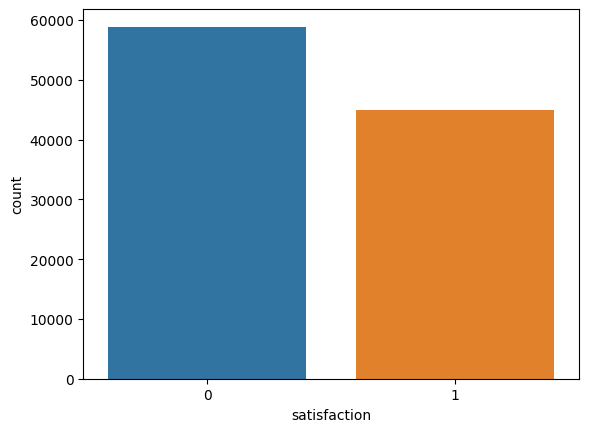

In [12]:
sns.countplot(x=trainData.satisfaction)

<AxesSubplot: xlabel='Inflight wifi service', ylabel='count'>

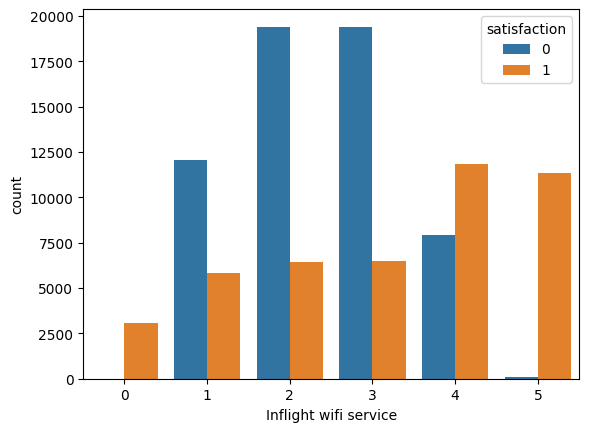

In [13]:
sns.countplot(data=trainData, x="Inflight wifi service", hue="satisfaction")

<AxesSubplot: xlabel='Departure/Arrival time convenient', ylabel='count'>

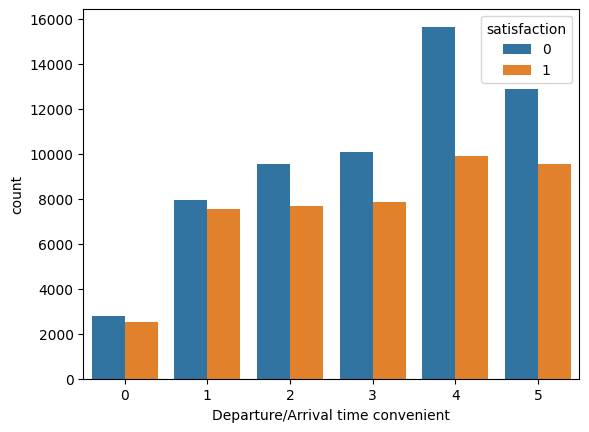

In [14]:
sns.countplot(data=trainData, x="Departure/Arrival time convenient", hue="satisfaction")

<AxesSubplot: xlabel='Ease of Online booking', ylabel='count'>

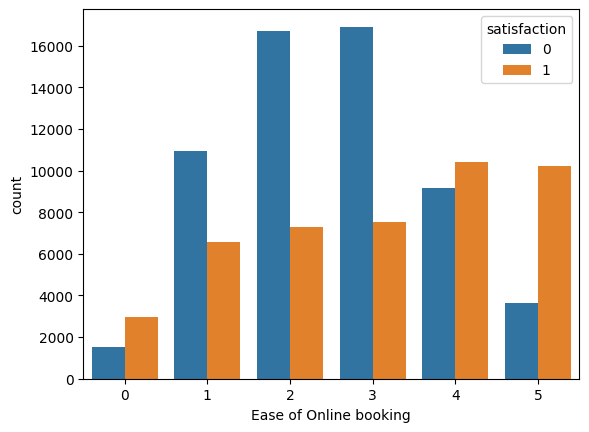

In [15]:
sns.countplot(data=trainData, x="Ease of Online booking", hue="satisfaction")

<AxesSubplot: xlabel='Gate location', ylabel='count'>

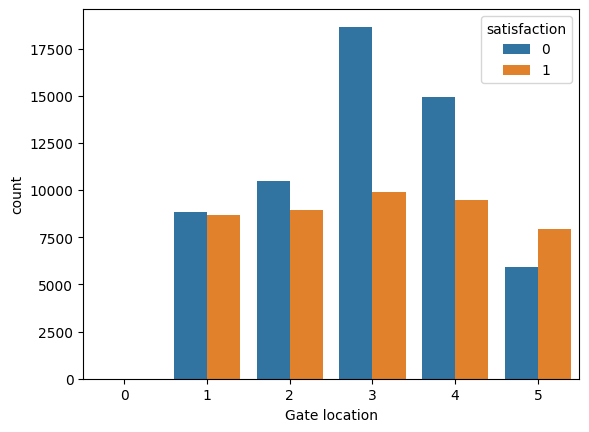

In [16]:
sns.countplot(data=trainData, x="Gate location", hue="satisfaction")

<AxesSubplot: xlabel='Flight Distance', ylabel='Count'>

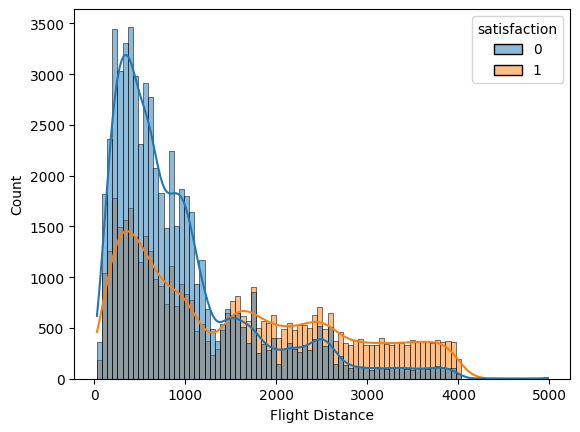

In [17]:
sns.histplot(data=trainData, x="Flight Distance", hue="satisfaction", kde=True)

## Entropy-loss/Gini-gain

[Text(0.5, 0.875, 'Online boarding <= 3.5\nentropy = 0.987\nsamples = 103904\nvalue = [58879, 45025]'),
 Text(0.25, 0.625, 'Inflight wifi service <= 3.5\nentropy = 0.607\nsamples = 52429\nvalue = [44627, 7802]'),
 Text(0.125, 0.375, 'Inflight wifi service <= 0.5\nentropy = 0.467\nsamples = 47700\nvalue = [42957, 4743]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Inflight wifi service <= 4.5\nentropy = 0.937\nsamples = 4729\nvalue = [1670, 3059]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Type of Travel <= 0.5\nentropy = 0.851\nsamples = 51475\nvalue = [14252, 37223]'),
 Text(0.625, 0.375, 'Online boarding <= 4.5\nentropy = 0.607\nsamples = 40983\nvalue = [6107, 34876]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Inflight wifi service <= 4.5\nentropy = 0.767\nsamples = 10492\nvalue = [8145, 2347]'),
 Text(0.8125, 0.125

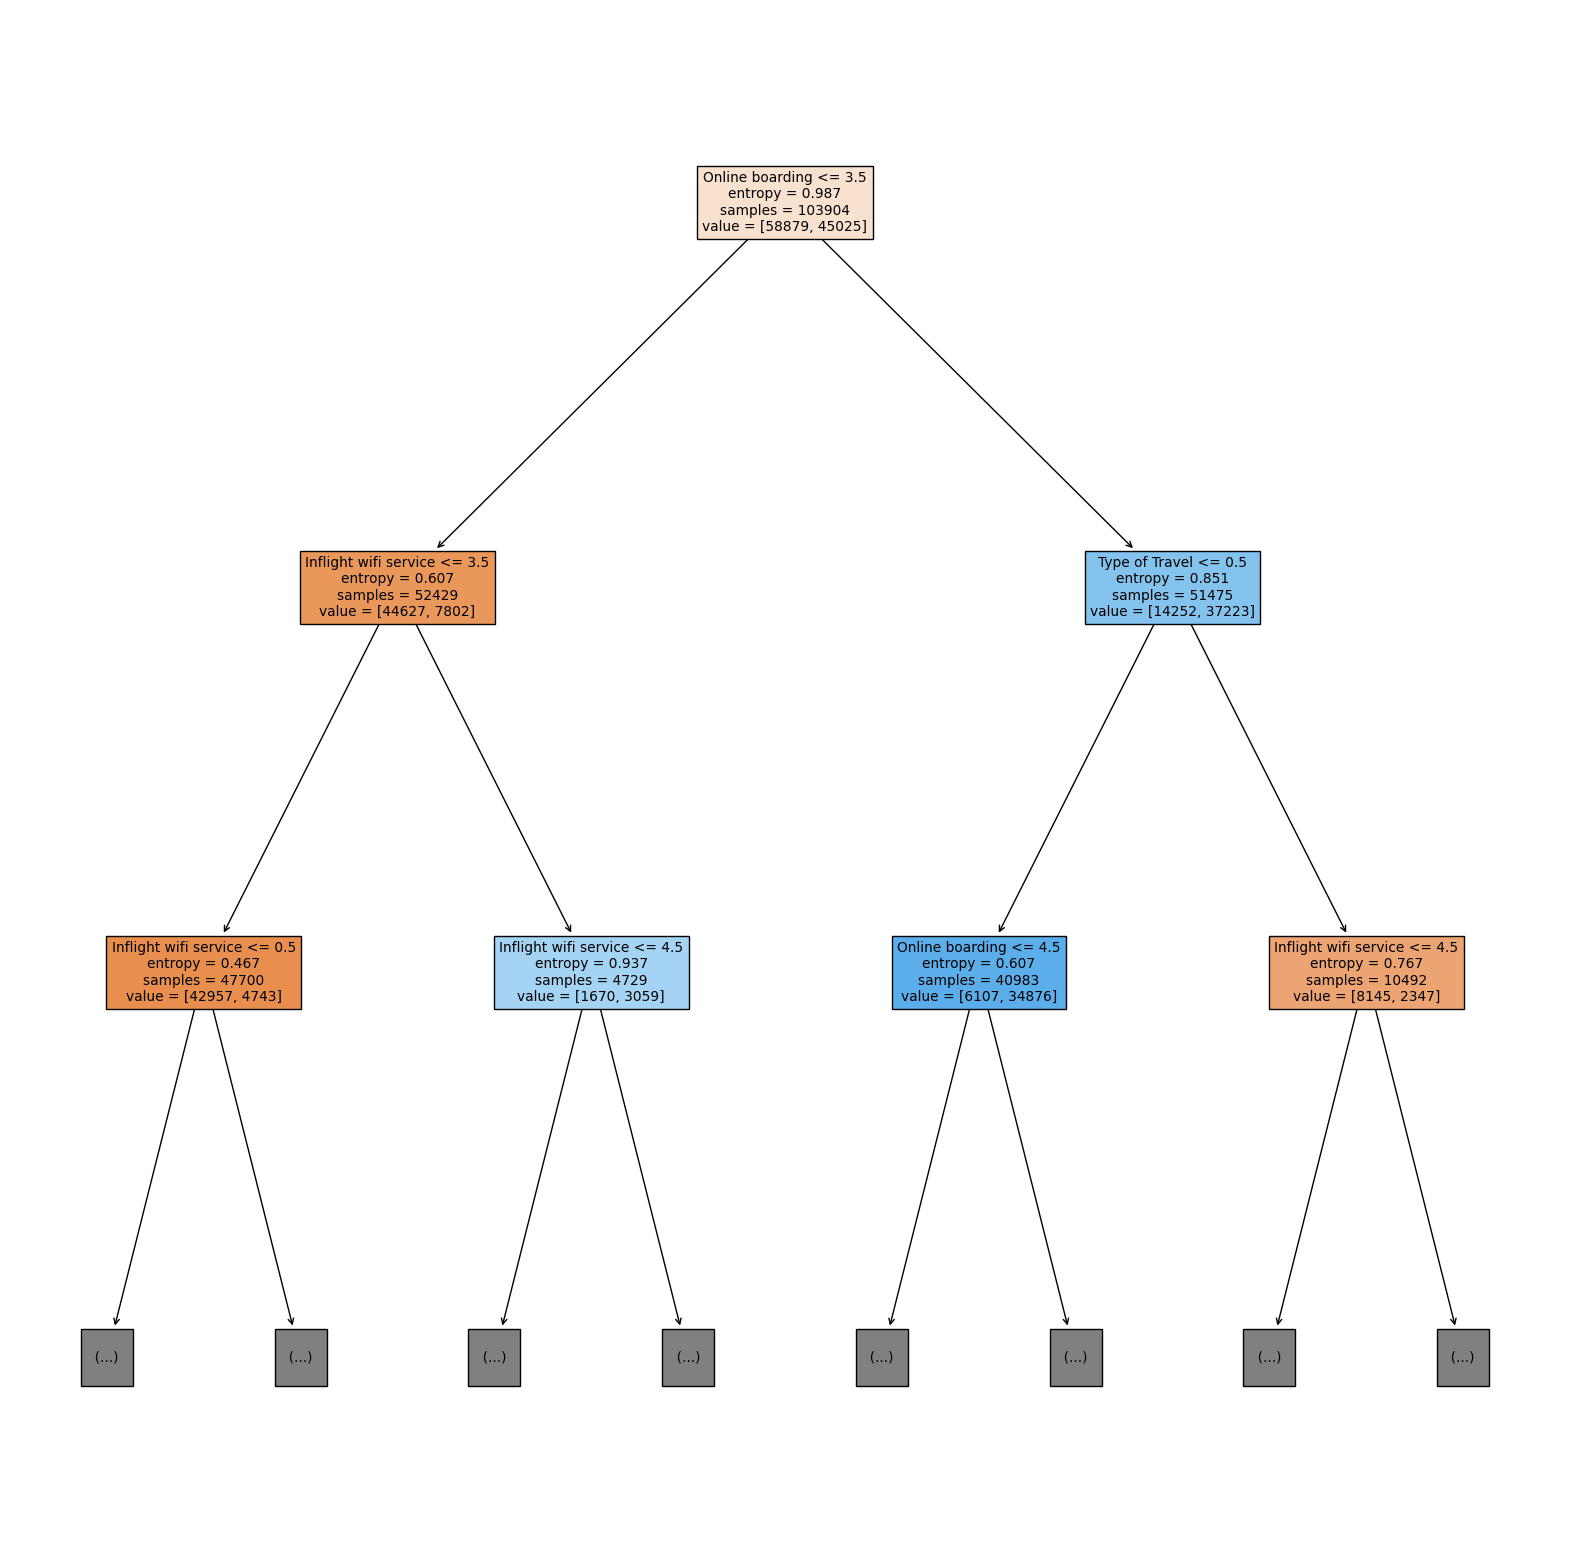

In [18]:
from sklearn import tree

X_train = trainData.drop(columns=['satisfaction'])
Y_train = trainData['satisfaction']
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)
clf.fit(X_train, Y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, feature_names=X_train.columns, max_depth = 2)

# Feature Selection

In [29]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

trainData2 = trainData.drop('satisfaction', axis = 1)
mutualRegression = mutual_info_regression(trainData2, trainData['satisfaction'])

In [20]:
mutualRegDict = {}
for i, val in enumerate(mutualRegression):
    mutualRegDict[trainData.columns[i]] = round(val, 6)
sortedMutDict = dict(sorted(mutualRegDict.items(), key=lambda item: item[1], reverse=True))

sortedMutDict

{'Online boarding': 0.209145,
 'Inflight wifi service': 0.160489,
 'Class': 0.134403,
 'Type of Travel': 0.112897,
 'Inflight entertainment': 0.092651,
 'Seat comfort': 0.081746,
 'Leg room service': 0.063275,
 'Flight Distance': 0.061356,
 'On-board service': 0.058842,
 'Cleanliness': 0.05607,
 'Ease of Online booking': 0.050063,
 'Age': 0.044518,
 'Inflight service': 0.03918,
 'Baggage handling': 0.037837,
 'Checkin service': 0.032666,
 'Food and drink': 0.026624,
 'Customer Type': 0.020879,
 'Gate location': 0.011765,
 'Arrival Delay in Minutes': 0.007291,
 'Departure Delay in Minutes': 0.003983,
 'Gender': 0.0,
 'Departure/Arrival time convenient': 0.0}

Estimates mutual information for a continuous target variable.

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

In [35]:
trainData.describe()

Gender  Customer Type            Age  Type of Travel  \
count  103904.000000  103904.000000  103904.000000   103904.000000   
mean        0.492541       0.182678      39.379706        0.310373   
std         0.499947       0.386404      15.114964        0.462649   
min         0.000000       0.000000       7.000000        0.000000   
25%         0.000000       0.000000      27.000000        0.000000   
50%         0.000000       0.000000      40.000000        0.000000   
75%         1.000000       0.000000      51.000000        1.000000   
max         1.000000       1.000000      85.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean        0.594135      1189.448375               2.729683   
std         0.620799       997.147281               1.327829   
min         0.000000        31.000000               0.000000   
25%         0.000000       414.000000               2.000000   
50%         1.000000       843.000000               3.000000   
75%         1.000000      1743.000000               4.000000   
max         2.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  ...  Inflight entertainment  On-board service  \
count  103904.000000  ...           103904.000000     103904.000000   
mean        2.976883  ...                3.358158          3.382363   
std         1.277621  ...                1.332991          1.288354   
min         0.000000  ...                0.000000          0.000000   
25%         2.000000  ...                2.000000          2.000000   
50%         3.000000  ...                4.000000          4.000000   
75%         4.000000  ...                4.000000          4.000000   
max         5.000000  ...                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  103904.000000               103904.000000             103904.000000   
mean        3.286351                   14.815618                 15.178145   
std         1.312273                   38.230901                 38.640910   
min         0.000000                    0.000000                  0.000000   
25%         2.000000                    0.000000                  0.000000   
50%         3.000000                    0.000000                  0.000000   
75%         4.000000                   12.000000                 13.000000   
max         5.000000                 1592.000000               1584.000000   

        satisfaction  
count  103904.000000  
mean        0.433333  
std         0.495538  
min         0.000000  
25%         0.

In [43]:
print(len(sortedMutDict))
# select k=18 (we can tune and test this using grid search) - only eliminate 4 features for now (22-18 = 4)
X_new = SelectKBest(mutual_info_regression, k=18).fit_transform(trainData2, trainData['satisfaction'])

print(len(X_new[0]))

22
18


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=165f94fd-0b8c-4538-a0fa-c0f4c355308f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>